# Find frequencies that make only $(\hat{a}^2\hat{b}^2\hat{e}^{2}+\hat{a}\hat{b}\hat{d}\hat{e}^{\dagger3})\hat{c}^\dagger +h.c.$ resonant in the 7th order expansion of $\sin(\hat{a}+\hat{b}+\hat{c}+\hat{d}-\hat{e}+h.c.)+\sin(\hat{a}+\hat{b}+\hat{c}-\hat{d}+\hat{e}+h.c.)$

Proceed as in the 5th order example.

In [1]:
import hamnonlineng as hnle

In [2]:
letters = 'abcde'
resonant = [hnle.Monomial(1, 'aabbeeC'), hnle.Monomial(1,'abdEEEC')]
abc_sum = hnle.operator_sum('abc')

In [3]:
abc_pd_me = abc_sum + hnle.Monomial(1,'d') - hnle.Monomial(1,'e')
abc_md_pe = abc_sum - hnle.Monomial(1,'d') + hnle.Monomial(1,'e')

In [4]:
sine_exp = (
            hnle.sin_terms(abc_pd_me, 3)
           +hnle.sin_terms(abc_pd_me, 5)
           +hnle.sin_terms(abc_pd_me, 7)
           +hnle.sin_terms(abc_md_pe, 3)
           +hnle.sin_terms(abc_md_pe, 5)
           +hnle.sin_terms(abc_md_pe, 7)
           )
off_resonant = hnle.drop_single_mode(
                 hnle.drop_definitely_offresonant(
                   hnle.drop_matching(sine_exp.m, resonant)))
off_resonant = list(off_resonant)
print('Number of off-resonant constraints: %d'%len(off_resonant))

Number of off-resonant constraints: 3182


Try to solve (takes around a minute):

In [5]:
res = hnle.head_and_count(
        hnle.solve_constraints_gecode(resonant, off_resonant, letters, maxfreq=44))

[1, 16, 44, 42, 5]
[16, 1, 44, 42, 5]
2 solutions.


Solve it again, but now with linear programming methods and continuous values for the frequencies.

In [6]:
hnle.solve_linearprog_pulp(resonant, off_resonant, letters, maxfreq=50, detune=1)

Adding resonant constraints...
Adding off-resonant constraints...
Adding distinct constraints...
Dumping LP file...
Solving...
Status: 1 - Optimal


[1.0, 16.0, 44.0, 42.0, 5.0]

Calculate the detuning of all off-resonant terms and plot a histogram (x: detuning, y: number of terms with that detuning).

In [7]:
dets = hnle.detuning_of_monomial(res[0], off_resonant, letters)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

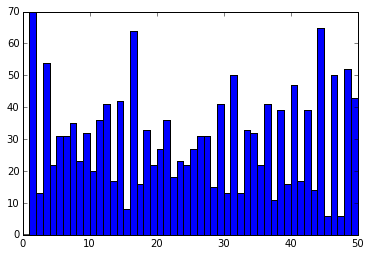

In [9]:
plt.hist(dets, bins=50, range=(0,50));

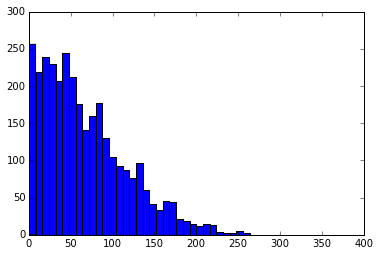

In [10]:
plt.hist(dets, bins=50, range=(0,400));